# Clojupyter - Clojure in Jupyter Lab, Notebook, and Console

This notebook demonstrates some of the features of Clojupyter.  Things that are shown here should work in both Jupyter Lab *and* Jupyter Notebook (and some of it in Jupyter Console as well, but since Clojure has the REPL we usually don't very much about Console).

Jupyter Lab and Jupyter Notebook are different in some respects, this notebook only shows features that work in both.  There are separate demo notebooks showing clojupyter's support for features that are specific to either Lab or Notebook.

## Basics: Evaluating Clojure expressions

Clojupyter basically lets you evaluate Clojure expressions from a Jupyter notebook, at its most fundament it is not unlike a regular Clojure REPL:

In [11]:
(set! clojure.core/*print-meta* true)

true

In [12]:
(with-meta [] {:a 1})

^{:a 1} []

In [13]:
(time (reduce + (range 1000)))

"Elapsed time: 0.665376 msecs"


499500

Note above that we both see the side-effects of printing *and* the result of evaluating the expression.  Let's see which version of Clojure and clojupyter we're using:

In [14]:
(println (str "Date:\t\t\t" (java.util.Date.)))
(println (apply format "Clojure version:\tv%d.%d" ((juxt :major :minor) *clojure-version*)))
(println (str "Clojupyter version:\t" (clojupyter.kernel.version/version-string)))
;

Date:			Sat Dec 28 18:37:47 CET 2024
Clojure version:	v1.11
Clojupyter version:	0.4.335


The **semicolon** at the end of the cell tells clojupyter not to print the result of evaluating the cell which is useful when we're only interested in side-effects such as loading libraries. In this instance the semicolon appears on its own line which is not necessary, as long as the semicolon is the last non-whitespace character it will have the effect of suppressing printing of the cell evaluation result.

## Rich content at your fingertips

We can use [Hiccup](https://github.com/weavejester/hiccup) to render HTML.  To do this conveniently, we first add convenient access to the `clojupyter.display` namespace usng the alias `display`:

In [15]:
(require '[clojupyter.display :as display])

nil

which gives us convenient access to generating formatted output using HTML:

In [16]:
;; displaying html
(display/hiccup-html 
    [:ul 
     [:li "a " [:i "emphatic"] " idea"]
     [:li "a " [:b "bold"] " idea"]
     [:li "an " [:span {:style "text-decoration: underline;"} "important"] " idea"]])

a emphatic idea a bold idea an important idea

which works for Scalable Vector Graphics (SVG) as well:

In [17]:
(display/hiccup-html
    [:svg {:height 100 :width 100 :xmlns "http://www.w3.org/2000/svg"}
            [:circle {:cx 50 :cy 40 :r 40 :fill "red"}]])

We also have direct access to displaying bitmaps, here a clokupyter logo:

Logo is of type: class java.awt.image.BufferedImage


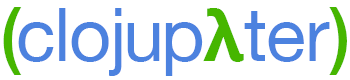

In [18]:
(->> clojupyter/*logo* type (str "Logo is of type: ") println)
clojupyter/*logo*

Overall, we have very direct access to controlling what is displayed by Jupyter:

In [19]:
(display/render-mime "text/plain" "This is plain text.")

This is plain text.

In [20]:
(display/render-mime "text/html" "<h1>This is a heading</h1>")

This is a heading

And we have all the facilities of Clojure at our disposal for generating the content in the notebook!

## Using external Clojure libraries

You can fetch external Clojure dependencies using `add-dependencies` in the namespace `clojupyter.misc.helper`:

In [21]:
(require '[clojupyter.misc.helper :as helper])
(helper/add-dependencies '[incanter "1.5.7"])
(use '(incanter core stats charts io)) ; include Incanter's facilities into working namespace
:ok

:ok

## Example: Plotting using Incanter

As shown above, clojupyter display bitmaps directly when [BufferedImage](https://docs.oracle.com/javase/7/docs/api/java/awt/image/BufferedImage.html) are returned. This makes it easy to use Java charting libraries, such as [Incanter](https://github.com/incanter/incanter), where charts are easily converted into a bitmaps. Since Incanter simply wraps the Java charting library [JFreeChart](https://github.com/incanter/incanter), we can call 
`(.createBufferedImage chart width height)` on any Incanter chart to get an image we can render as cell output:

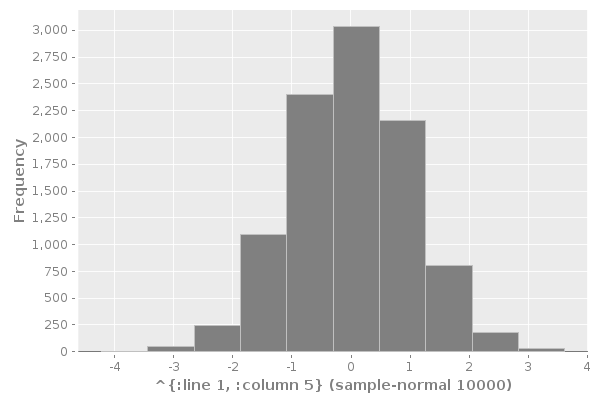

In [22]:
(-> (sample-normal 10000)
    histogram
    (.createBufferedImage 600 400))

Here's an example of a scatter plot:

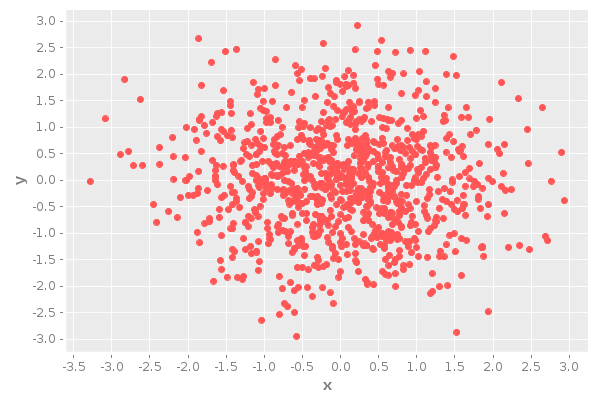

In [23]:
(-> (scatter-plot (sample-normal 1000) 
                  (sample-normal 1000)
                  :x-label "x" :y-label "y")
    (.createBufferedImage 600 400)) 

And with a very liberal license, you can do pretty much whatever you want with clojupyter:

In [24]:
clojupyter/*license*

Copyright (c) 2014 Rory Kirchner

Permission is hereby granted, free of charge, to any person obtaining
a copy of this software and associated documentation files (the
"Software"), to deal in the Software without restriction, including
without limitation the rights to use, copy, modify, merge, publish,
distribute, sublicense, and/or sell copies of the Software, and to
permit persons to whom the Software is furnished to do so, subject to
the following conditions:

The above copyright notice and this permission notice shall be
included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND,
EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF
MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND
NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE
LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION
OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION
WITH TH

**We hope you'll enjoy clojupyter!**